# Imports

In [1]:
# Tobi

from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from xgboost import XGBClassifier

In [2]:
# Simon

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# Data Analysis Tobi

In [57]:
mushrooms_train = pd.read_csv('data/train.csv')
mushrooms_test = pd.read_csv('data/test.csv')

## Value Counts
* Balanced classes
* All data categorical
* Some categories have only few members

In [ ]:
# for column in mushrooms_train.columns:
#     print(column, '\n', mushrooms_train[column].value_counts().sort_values(ascending=False), '\n')

## Missing Values
* No missing values

In [ ]:
# for column in mushrooms_test.columns:
#     print(column, '\n', mushrooms_test[column].isna().sum(), '\n')

In [58]:
# Split in features and target
X = mushrooms_train.drop(['poisonous'], axis=1)
y = mushrooms_train['poisonous']

# Preprocessor pipe

In [7]:
preprocessor = Pipeline(steps= [
    ('transformer', OneHotEncoder(drop= 'first'))
    ])

## Apply pipe to data

In [8]:
X.drop('Id', axis=1, inplace = True)
X_test_final = mushrooms_test.drop(['Id'], axis=1)

In [59]:
X = pd.DataFrame.sparse.from_spmatrix(preprocessor.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

# apply to test data
X_test_final = pd.DataFrame.sparse.from_spmatrix(preprocessor.fit_transform(X_test_final))

# Functions

## Plot AUROC

In [10]:
def plotAUROC(model, X_test, y_test):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    return threshold

## Get Confusion Matrix

In [11]:
def get_confusion_matrix(y_test, y_pred_test):
    confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_test),
                                    columns=['Predicted Not Poisonous', 'Predicted Poisonous'],
                                    index=['True Not Poisonous', 'True Poisonous']
                                    )
    return confusion_matrix

# Random Forest

In [64]:
random_forest = RandomForestClassifier(random_state=1337)
random_forest.fit(X, y)

y_pred_train = random_forest.predict(X_train)
y_pred_test = random_forest.predict(X_test)

y_pred_final = random_forest.predict(X_test_final)

print('Accuracy on train-set: ', accuracy_score(y_true = y, y_pred = y_pred_train))
print('Accuracy on test-set: ', accuracy_score(y_true = y, y_pred = y_pred_test))

ValueError: X has 36 features, but RandomForestClassifier is expecting 6534 features as input.

# XGBoost

In [13]:
# xgboost = XGBClassifier(random_state=1337)
# xgboost.fit(X_train.to_numpy(), y_train.to_numpy())

# y_pred_train = xgboost.predict(X_train.to_numpy())
# y_pred_test = xgboost.predict(X_test.to_numpy())

# print('Accuracy on train-set: ', accuracy_score(y_true = y_train.to_numpy(), y_pred = y_pred_train))
# print('Accuracy on test-set: ', accuracy_score(y_true = y_test.to_numpy(), y_pred = y_pred_test))

# Plot Models

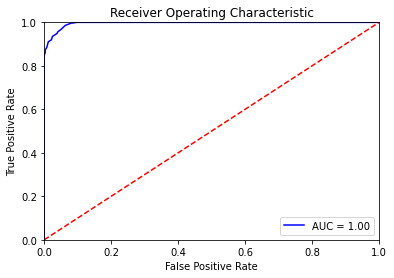

In [16]:
threshold_random_forest = plotAUROC(random_forest, X_test, y_test)
# threshold_xgboost = plotAUROC(xgboost, X_test.to_numpy(), y_test.to_numpy())

In [17]:
get_confusion_matrix(y_test, y_pred_test)

,Predicted Not Poisonous,Predicted Poisonous
True Not Poisonous,619,32
True Poisonous,22,627


# Change Value of False Positives to True

In [37]:
mushrooms_train

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,Id,poisonous
0,k,e,False,w,w,v,6573,1
1,f,e,True,p,w,y,4426,0
2,b,w,False,w,w,s,7018,0
3,k,g,False,w,w,n,5789,0
4,f,n,True,p,g,v,6187,0
...,...,...,...,...,...,...,...,...
6494,f,g,False,b,b,v,7002,1
6495,k,e,False,p,p,v,7323,1
6496,f,g,False,n,b,y,6206,1
6497,f,n,True,w,w,s,4658,0


In [46]:
type(mushrooms_train)

pandas.core.frame.DataFrame

In [45]:
type(pd.DataFrame(y_test))

pandas.core.frame.DataFrame

In [66]:
# y_test = (
#     pd
#     .merge(pd.DataFrame(y_test), mushrooms_train, left_index=True, right_index=True, how='left')[['Id', 'poisonous_y']]
#     .rename(columns={"poisonous_y": "poisonous"})
# )

# y_test


(
    y_test
    .assign(prediction=y_pred_test)
    .query('poisonous == 0')
    .query('prediction == 1')
)

,Id,poisonous,prediction


In [65]:
def returnFalsePositiveIds (test, pred_test):
    # get ids of test values
    test = (
        pd
        .merge(pd.DataFrame(test), mushrooms_train, left_index=True, right_index=True, how='left')[['Id', 'poisonous_y']]
        .rename(columns={"poisonous_y": "poisonous"})
    )

    #get ids of false positives
    falsePositiveIds = (
        test
        .assign(prediction=pred_test)
        .query('poisonous == 0 & prediction == 1')
        ['Id']
    )

    return list(falsePositiveIds)


# Final Output

In [ ]:
(
    mushrooms_test
    .assign(poisonous=y_pred_final)
    [['Id', 'poisonous']]
    )

,Id,poisonous
0,5165,1
1,4281,0
2,231,1
3,3890,1
4,1521,0
...,...,...
1620,983,1
1621,7055,1
1622,7456,1
1623,5132,1
